# Predicting a Pulsar Star

Data set describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

### Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile  
2. Standard deviation of the integrated profile  
3. Excess kurtosis of the integrated profile  
4. Skewness of the integrated profile  
5. Mean of the DM-SNR curve  
6. Standard deviation of the DM-SNR curve  
7. Excess kurtosis of the DM-SNR curve  
8. Skewness of the DM-SNR curve  
9. Class

17,898 total examples. 1,639 positive examples. 16,259 negative examples.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Most of the code was taken from https://www.kaggle.com/efeergun96/prediciting-a-pulsar-star

## Loading the dataset

In [2]:
DataFrame = pd.read_csv("pulsar_stars.csv")  

# EDA

In [3]:
DataFrame.head()    # first 5 rows of whole columns

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
DataFrame.info() # information about data types and amount of non-null rows of our Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Data types are all numeric and non-null, I don't need to do any transformations or cleaning.

In [5]:
DataFrame.describe()   # statistical information about our data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
DataFrame.corr()    # correlation between fields

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


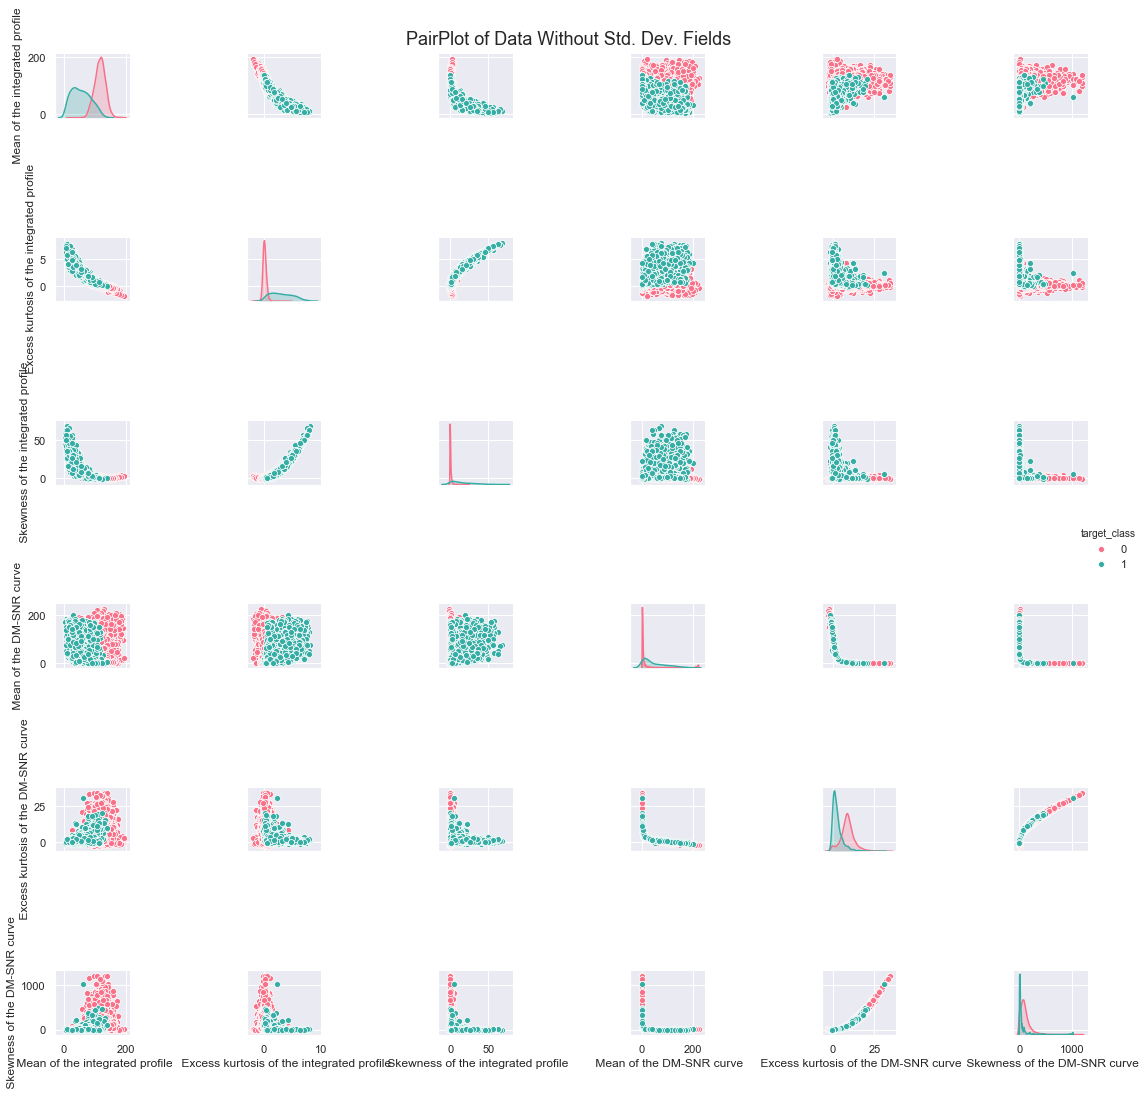

In [7]:
# PairPlot (each column is compared to others and itself)

sns.pairplot(data=DataFrame,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data

We can see that our data is quite separable on most of the columns.

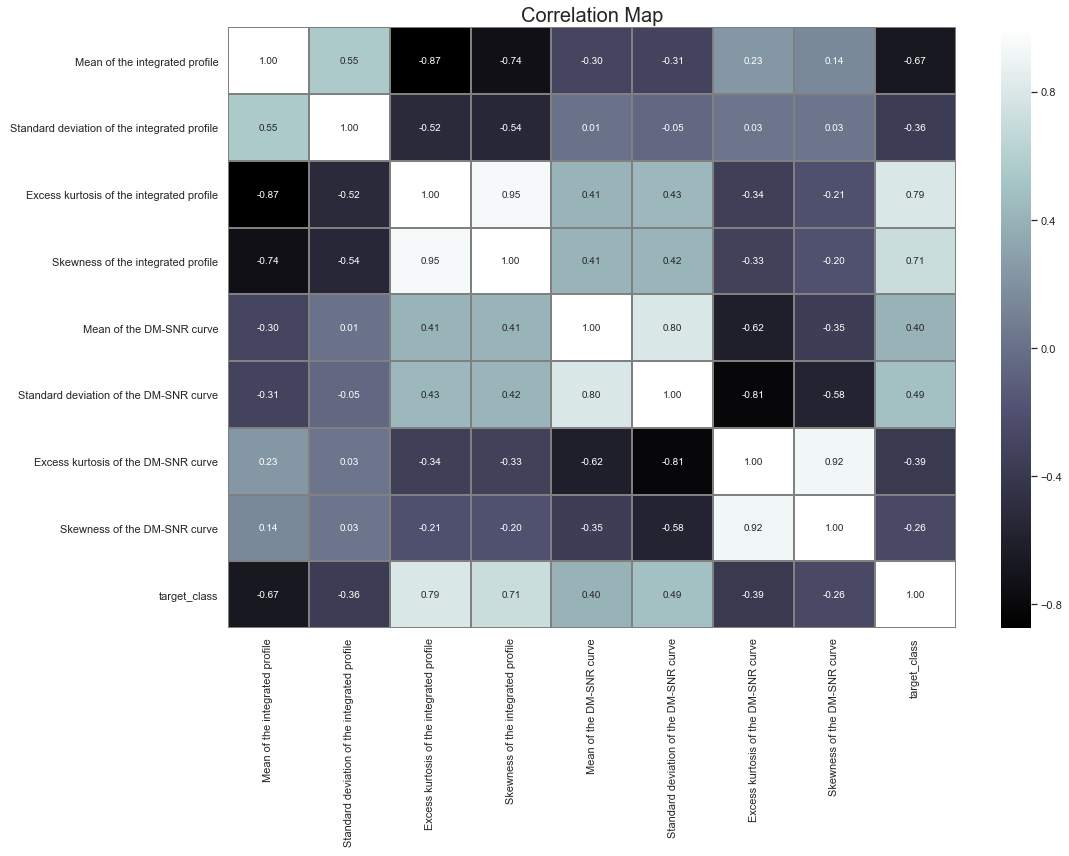

In [8]:
# Correlation HeatMap

plt.figure(figsize=(16,12))
sns.heatmap(data=DataFrame.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()      # lightest and darkest cells are most correlated ones

Most of our Columns are already related or derived from one or another and we can see it clearly on some cells above.

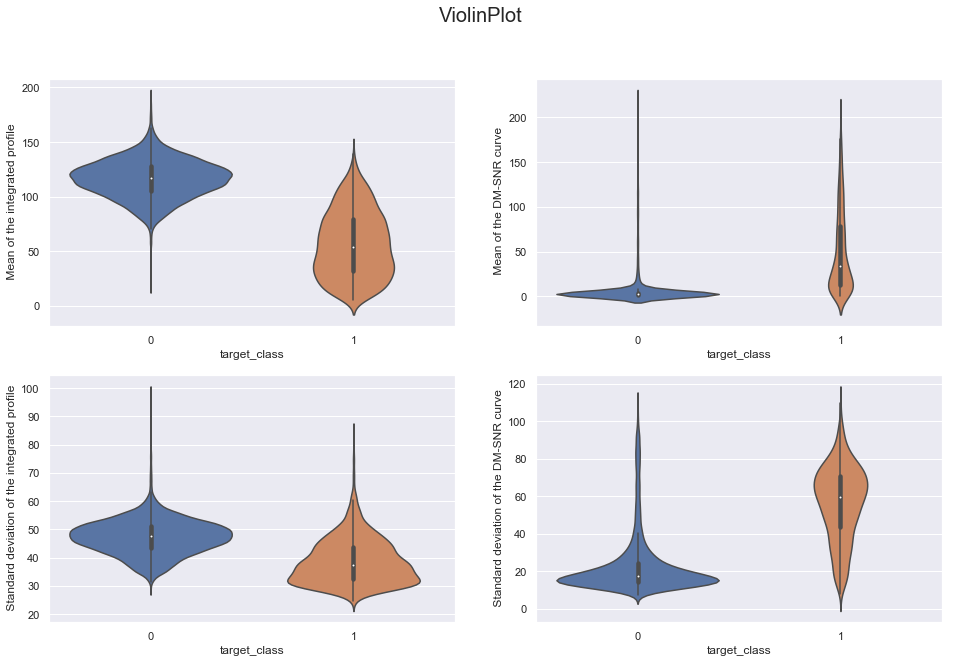

In [9]:
# ViolinPlot (act as a boxplot but we can see amounts too)

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.violinplot(data=DataFrame,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sns.violinplot(data=DataFrame,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sns.violinplot(data=DataFrame,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sns.violinplot(data=DataFrame,y=" Standard deviation of the DM-SNR curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()

We can see that our data has different kind of distributions which is helpful for training our models.

## Data PreProcessing

In [10]:
# Splitting the Feature and Label fields

labels = DataFrame.target_class.values
DataFrame.drop(["target_class"],axis=1,inplace=True)
features = DataFrame.values

In [11]:
# Scaling the Features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)

/Users/HuongGiangTran/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [12]:
# Splitting the Train and the Test rows

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,random_state = 1, test_size=0.2)

# Machine Learning Models 

### Random Guess

In [13]:
data_size = DataFrame.shape[0]
is_positive = np.sum(labels == 1)/data_size #probability that y=1
is_negative = np.sum(labels == 0)/data_size

# Accuracy
print("Accuracy is", '%.03f' %is_negative)

# AUROC
print("AUROC is 0.500")

#AUPRC
print("AUPRC is", '%.03f' %is_positive)

Accuracy is 0.908
AUROC is 0.500
AUPRC is 0.092


### SVM

In [ ]:
# Fitting SVM

from sklearn.svm import SVC
svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)
svm_model.fit(x_train,y_train)
y_head_svm = svm_model.predict(x_test)
svm_score = svm_model.score(x_test,y_test)

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test,y_head_svm)

plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svm_model.predict_proba(x_test) # probabilities for class 0,1
preds = probs[:,1] # probabilities for class 1
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, preds)

plt.title('Precision Recall Curve')
plt.hlines(is_positive, 0, 1, colors = 'k', linestyle = 'dashed')
plt.plot(recall, precision, 'b')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('Precision')
plt.xlabel('Recall')

plt.show()

In [ ]:
# accuracy, log_loss and F1

from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
print("Accuracy is", '%.03f' %svm_score)
print("log_loss is", '%.03f' %log_loss(y_test, probs))
print("F1 is", '%.03f' %f1_score(y_test, y_head_svm))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")
lr_model.fit(x_train,y_train)
y_head_lr = lr_model.predict(x_test)
lr_score = lr_model.score(x_test,y_test)

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)

plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")
plt.show()

In [ ]:
probs = lr_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, preds)

plt.title('Precision Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.3f' % auc(recall, precision))
plt.legend(loc = 'lower left')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# accuracy, log_loss and F1

print("Accuracy is", '%.03f' %lr_score)
print("log_loss is", '%.03f' %log_loss(y_test, probs))
print("F1 is", '%.03f' %f1_score(y_test, y_head_lr))

### Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)
dc_model.fit(x_train,y_train)
y_head_dc = dc_model.predict(x_test)
dc_score = dc_model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dc = confusion_matrix(y_test,y_head_dc)

plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")
plt.show()

In [ ]:
probs = dc_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, preds)

plt.title('Precision Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.3f' % auc(recall, precision))
plt.legend(loc = 'lower left')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# accuracy, log_loss and F1

print("Accuracy is", '%.03f' %dc_score)
print("log_loss is", '%.03f' %log_loss(y_test, probs))
print("F1 is", '%.03f' %f1_score(y_test, y_head_dc))

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=37,random_state=42,max_leaf_nodes=200,criterion="entropy")

rfc_model.fit(x_train,y_train)
y_head_rfc = rfc_model.predict(x_test)
rfc_score = rfc_model.score(x_test,y_test)

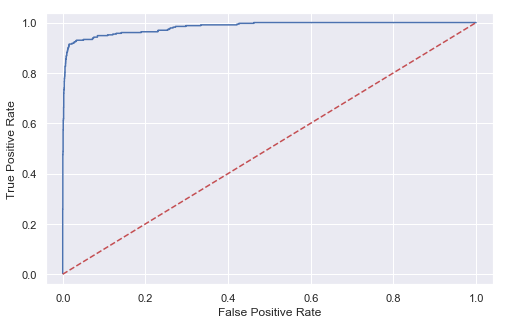

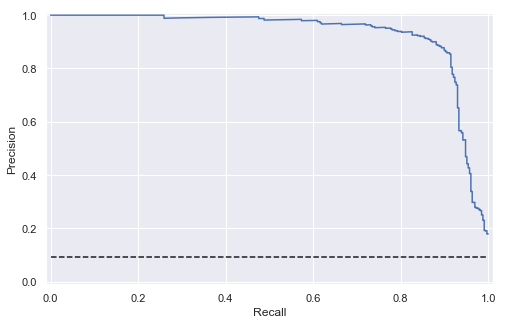

0.07222319728732327

In [20]:
probs = rfc_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b')
plt.rcParams["figure.figsize"] = (8,5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.04])
plt.ylim([-0.04, 1.04])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('exampleROCcurve.png')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, preds)


plt.plot(recall, precision, 'b')
plt.rcParams["figure.figsize"] = (8,5)
plt.hlines(is_positive, 0, 1, colors = 'k', linestyle = 'dashed')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('examplePRcurve.png')
plt.show()

from sklearn.metrics import log_loss
log_loss(y_test, preds)

In [ ]:
# accuracy, log_loss and F1

print("Accuracy is", '%.03f' %rfc_score)
print("log_loss is", '%.03f' %log_loss(y_test, probs))
print("F1 is", '%.03f' %f1_score(y_test, y_head_rfc))

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x_train,y_train)
y_head_nb = nb_model.predict(x_test)
nb_score = nb_model.score(x_test,y_test)

In [ ]:
probs = nb_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, preds)

plt.title('Precision Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.3f' % auc(recall, precision))
plt.legend(loc = 'lower left')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# accuracy, log_loss and F1

print("Accuracy is", '%.03f' %nb_score)
print("log_loss is", '%.03f' %log_loss(y_test, probs))
print("F1 is", '%.03f' %f1_score(y_test, y_head_nb))

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights="distance")

knn_model.fit(x_train,y_train)
y_head_knn = knn_model.predict(x_test)
knn_score = knn_model.score(x_test,y_test)

In [ ]:
probs = knn_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('exampleROCcurve.png')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, preds)

plt.title('Precision Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.3f' % auc(recall, precision))
plt.legend(loc = 'lower left')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# accuracy, log_loss and F1

print("Accuracy is", '%.03f' %knn_score)
print("log_loss is", '%.03f' %log_loss(y_test, probs))
print("F1 is", '%.03f' %f1_score(y_test, y_head_knn))

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

dec = DecisionTreeClassifier(random_state=42)
ran = RandomForestClassifier(n_estimators=37,random_state=42,max_leaf_nodes=200,criterion="entropy")
knn = KNeighborsClassifier(n_neighbors=7,weights="distance")
svm = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)
naive = GaussianNB()
lg = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive,
          "Logistic regression" : lg}
acc_scores = { }
auroc = { }
auprc = { }
logloss = { }
F1 = { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    acc_scores[key] = model.score(x_test, y_test)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    auroc[key] = metrics.auc(fpr, tpr)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    auprc[key] = auc(recall, precision)
    predict = model.predict(x_test)
    logloss[key] = log_loss(y_test, probs)
    F1[key] = f1_score(y_test, predict)

/Users/HuongGiangTran/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


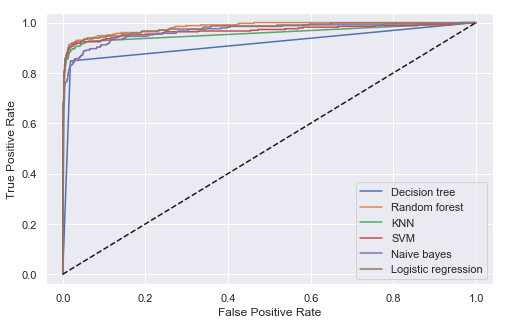

In [21]:
#roc
for key, value in models.items(): 
    probs = value.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = '{}'.format(key))
    
plt.legend()
plt.rcParams["figure.figsize"] = (8,5)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1.04])
plt.ylim([-0.04, 1.04])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('pulsar_star_ROCcurve.png')
plt.show()

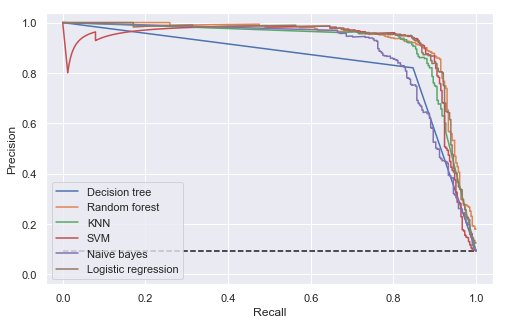

In [16]:
#pr
for key, value in models.items(): 
    probs = value.predict_proba(x_test)
    preds = probs[:,1]    
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)

    plt.plot(recall, precision, label = '{}'.format(key))
    
plt.hlines(is_positive, 0, 1, colors = 'k', linestyle = 'dashed')
plt.rcParams["figure.figsize"] = (8,5)
plt.legend()
plt.xlim([-0.04, 1.04])
plt.ylim([-0.04, 1.04])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pulsar_star_PRcurve.png')
plt.show()

Below is the classifier comparison with five different performance measures:

![Performance Comparison](pulsar_star_table.png)

### Overall Analysis

From the table above we can see that all classifiers perform very well.

According to all performance measures we can say that Decision Tree and Naive Bayes perform the worst out of these classifiers. However, AUROC is the only measure where KNN perform worse than Naive Bayes, in fact, Naive Bayes seems to be one of the better classifiers according to AUROC. Though, in other measures, KNN is one of the best classifiers (according to accuracy, AUPRC and F1). Log_loss also agrees with AUROC, KNN is the third worse.

Accuracy and F1 seems to give us similar classifier comparison, with SVM being the best classifier. On the other hand, all other measures show that Random Forest is the best. Random Forest is the third best according to F1.

In conclusion, AUROC, AUPRC and log_loss agree on the best and the worst classifier. However, there are big disagreements between third best and second worst classifiers. Log_loss gave us the most diverse scores for each classifier. All other measures have very high (and similar) scores for all classifiers, suggesting that this classification problem is easy. In my opinion, log_loss is the best measure in this case.